In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

# --- 1. Generate Dummy Retail Data (test_data.xlsx) ---
print("Generating test_data.xlsx...")
data = {
    'Invoice': [536365 + i for i in range(100)],
    'StockCode': ['85123A', '71053', '84406B', '84029G', '84029E'] * 20,
    'Description': ['Item A', 'Item B', 'Item C', 'Item D', 'Item E'] * 20,
    'Quantity': np.random.randint(1, 50, 100),
    'InvoiceDate': pd.date_range(start='1/1/2011', periods=100),
    'Price': np.random.uniform(1.0, 100.0, 100).round(2),
    'Customer ID': np.random.randint(1000, 1050, 100),
    'Country': ['United Kingdom', 'France', 'Germany', 'Spain', 'Belgium'] * 20
}
df_retail = pd.DataFrame(data)
# Add some NaNs to test your cleaning skills (as required by the exam)
df_retail.loc[10:15, 'Customer ID'] = np.nan
df_retail.to_excel('test_data.xlsx', index=False)

# --- 2. Generate Dummy Clustering Data (data_test_clustering_A1.csv) ---
print("Generating data_test_clustering_A1.csv...")
# Generate 100 rows of data with 8 features
X, _ = make_blobs(n_samples=100, n_features=8, centers=3, random_state=42)
df_cluster = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(8)])
df_cluster.to_csv('data_test_clustering_A1.csv', index_label='Index') # Exam usually has an index column

print("Files created successfully! You are ready to practice.")


Generating test_data.xlsx...
Generating data_test_clustering_A1.csv...
Files created successfully! You are ready to practice.


In [21]:
df = pd.read_excel('/content/test_data.xlsx')

subset = df.iloc[20:80].copy()


orginal_len = len(subset)
subset.dropna(inplace=True)
print(f'Lenght before dropping na {orginal_len}, after dropping Nan roows {len(subset)}')


#Unique Invoices
uniq_invoice = subset['Invoice'].nunique()

print(f'The amount of unique invoices in the provided dataset for indexes (20, 80) is equal to {uniq_invoice}')

country_count = subset['Country'].value_counts()
print(f'Country with most order {country_count.idxmax()} ({country_count.max()})')
print(f"Least Orders: {country_count.idxmin()} ({country_count.min()})")

subset['Total_Price'] = subset['Price']*subset['Quantity']
max_price_row = subset.loc[subset['Total_Price'].idxmax()]
print(f"Highest Total Price: {max_price_row['Total_Price']} (Order ID: {max_price_row['Invoice']})")

customer_spending = subset.groupby('Customer ID')['Total_Price'].sum().sort_values(ascending=False)

if len(customer_spending)>1:
  second_best_customer = customer_spending.index[1]

  second_best_amount = customer_spending.iloc[1]

  order_count = subset[subset['Customer ID'] == second_best_customer].shape[0]
  print(f"2nd Highest Spender ID: {second_best_customer}")
  print(f"Total Amount: {second_best_amount}")
  print(f"Order Count: {order_count}")
else:
  print("Not enough customers to determine 2nd highest.")

Lenght before dropping na 60, after dropping Nan roows 60
The amount of unique invoices in the provided dataset for indexes (20, 80) is equal to 60
Country with most order United Kingdom (12)
Least Orders: United Kingdom (12)
Highest Total Price: 4715.04 (Order ID: 536418)
2nd Highest Spender ID: 1040.0
Total Amount: 4789.72
Order Count: 2


In [22]:
df_k  = pd.read_csv('/content/data_test_clustering_A1.csv')

print(df_k)


    Index  Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0       0   4.083048   5.916792  -9.837274  10.369768   7.294229  -4.384586   
1       1  -5.756029  -0.784448  -1.985918  -4.149326   2.754717  -7.935867   
2       2  -1.883530   8.157129   3.568986   2.455642  -7.103090  -6.166109   
3       3   2.712444   3.760231  -9.364218   9.410789   6.746529  -6.526228   
4       4  -3.224501   9.693884   3.909512   2.189628  -6.834055  -7.531710   
..    ...        ...        ...        ...        ...        ...        ...   
95     95  -3.709494   8.679785   4.164934   1.319840  -5.114173  -6.475128   
96     96   1.182578   3.562059 -11.712206   8.872442   5.889720  -5.602824   
97     97   1.016283   2.947263  -8.430199  10.189860   7.272973  -5.124872   
98     98  -3.737454  -0.840216  -0.980902  -3.564831   2.796848  -6.129342   
99     99  -2.949242   9.145027   6.081152   0.537308  -5.716463  -6.869877   

    Feature_6  Feature_7  
0   -7.328424  -5.645858

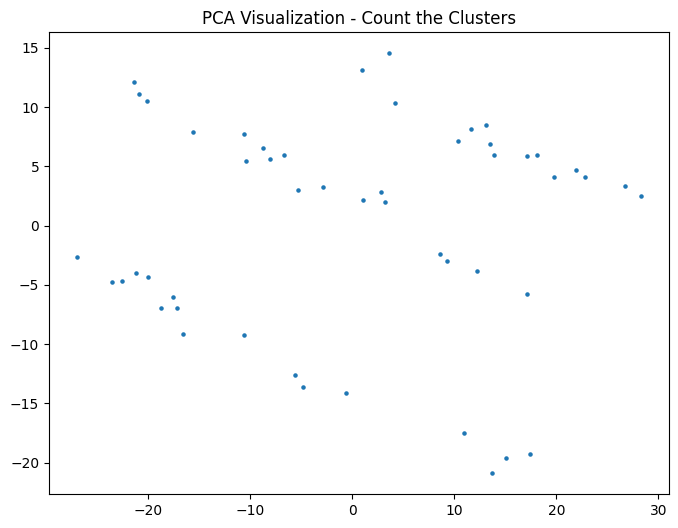

Row 15 PCA Components: [17.08185382 -5.76191497]
Row 45 PCA Components: [-10.46402514   5.44027076]
Euclidean Distance: 29.73658374818702
Enter number of clusters observed in plot: 3
Row 15 Cluster Label: 2
Row 45 Cluster Label: 1


In [36]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import distance
import matplotlib.pyplot as plt

subset_k =- df_k.iloc[10:60].copy()
#print(subset_k)

subset_k.dropna(inplace=True)

pca = PCA(n_components=2)
pca_data   = pca.fit_transform(subset_k)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], s=5)
plt.title("PCA Visualization - Count the Clusters")
plt.show()

pos_a = subset_k.index.get_loc(15)
pos_b = subset_k.index.get_loc(45)

comp_a  = pca_data[pos_a]
comp_b  = pca_data[pos_b]

print(f"Row {15} PCA Components: {comp_a}")
print(f"Row {45} PCA Components: {comp_b}")

dist = distance.euclidean(comp_a,comp_b)

print(f"Euclidean Distance: {dist}")


n_clusters = int(input("Enter number of clusters observed in plot: "))


kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
labels = kmeans.fit_predict(subset_k)

label_a = labels[pos_a]
label_b = labels[pos_b]

print(f"Row {15} Cluster Label: {label_a}")
print(f"Row {45} Cluster Label: {label_b}")
